In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [2]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [3]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage

In [4]:
model = PySRRegressor()

In [5]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x[0:114],T[0:114], s=5, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x[0:114],error(T,T_1)[0:114],s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

----
# Without massive neutrinos
----

In [6]:
tf = pd.read_csv('TF_16_test.csv')
k = tf['k (h/Mpc)'].values
z = (tf['k (h/Mpc)']/tf['omega_m']).values
x = tf['x'].values
y = pd.DataFrame({'k': tf['k (h/Mpc)'], 'om_b': tf['omega_b'],'om_m': tf['omega_m']})
T = tf['T(k)'].values
#x = x.reshape(-1,1)
#z = z.reshape(-1,1)

In [7]:
a = 64
b = len(k)
alpha = int(b/a)
zed = np.array(z[0:alpha])

In [8]:
list_interm = []
for i in range(a):
    k_prov = k[i * alpha:(i + 1) * alpha]
    x_prov = x[i * alpha:(i + 1) * alpha]
    T_prov = T[i * alpha:(i + 1) * alpha]
    om_m_prov = tf['omega_m'][i * alpha:(i + 1) * alpha].values
    om_b_prov = tf['omega_b'][i * alpha:(i + 1) * alpha].values
    list_prov = [k_prov, x_prov, om_b_prov, om_m_prov, T_prov]
    list_interm.append(list_prov)

1. Unknown $\omega_m$ and unknown $\omega_b$

In [9]:
test_list = [list_interm[36],list_interm[37],list_interm[38],list_interm[39],list_interm[44],list_interm[45],list_interm[46],list_interm[47],list_interm[52],list_interm[53],list_interm[54],list_interm[55],list_interm[60],list_interm[61],list_interm[62],list_interm[63]]

In [11]:
z_test_list = []
x_test_list = []
T_test_list = []
for i in range(len(test_list)):
    z_test_list.extend(test_list[i][0]/test_list[i][3][0])
    x_test_list.extend(test_list[i][1])
    T_test_list.extend(test_list[i][4])
z_test = np.array(z_test_list).reshape(-1,1)
x_test = np.array(x_test_list).reshape(-1,1)
T_test = np.array(T_test_list)

Checking if hall_of_fame_2023-09-29_162254.516.pkl exists...
Loading model from hall_of_fame_2023-09-29_162254.516.pkl
Model equation is:  \frac{0.197}{x_{0}^{1.08} + 1.12 x_{0}^{1.75} + 0.195}
The accuracy of the model is:  98.35 %
Max percentage error is:  6.54 %


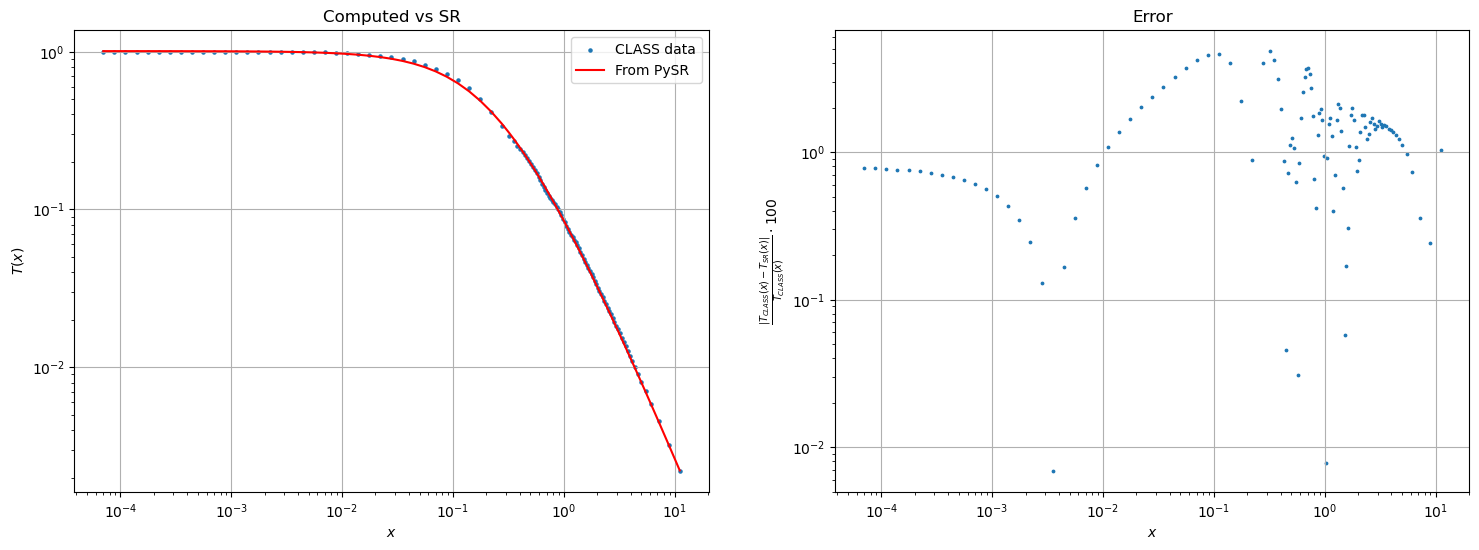

In [12]:
bran(z_test,T_test,'hall_of_fame_2023-09-29_162254.516.pkl')